In [1]:
import pandas as pd
from IPython.display import Image

## Objective
How to account for the 8-10% of unresolved issues, esp when some categories have ~70% of their 2016 issues unresolved?

Let's do 2 things:
1. Make some manual cutoff for when to stop looking at recent issues, since more recent issues are more likely to be unresolved.
2. Make a simple model using Logistic Regression, and k-fold cross val with maybe k=1, or 5.

## Part 1: Manually choosing cutoff

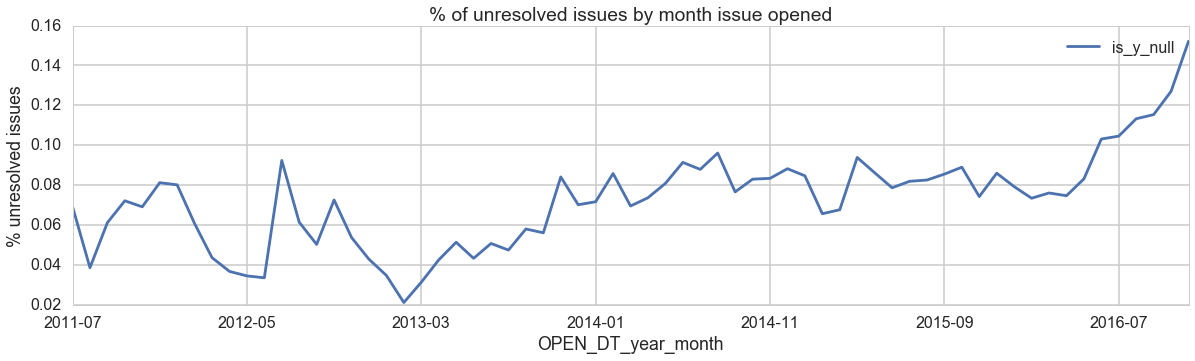

In [2]:
Image('unresolved_issues_trend.png')

We see that the % of unresolved issues starts creeping up around May 2016, about 8 months before the present Jan 2017.

Is there a difference in the category makeup of the unresolved issues pre- and post-May 2016?

In [3]:
df = pd.read_pickle('../data/data_2016_w_descs_and_census.pkl')

In [11]:
df[df.OPEN_DT > '2016-03-01'][df.OPEN_DT < '2016-06-01'][df.CLOSED_DT.isnull()][['TYPE', 'CASE_ENQUIRY_ID']] \
    .groupby('TYPE').count().sort_values('CASE_ENQUIRY_ID', ascending=False).head(20)

/Users/datascientist/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


,CASE_ENQUIRY_ID
TYPE,
General Comments For a Program or Policy,303
Animal Generic Request,210
Electrical,128
Request for Pothole Repair,101
Unsatisfactory Living Conditions,91
Tree Maintenance Requests,90
Street Light Outages,88
Heat - Excessive Insufficient,78
Sign Repair,73


In [18]:
pre = set(df[df.OPEN_DT > '2016-03-01'][df.OPEN_DT < '2016-06-01'][df.CLOSED_DT.isnull()][['TYPE', 'CASE_ENQUIRY_ID']] \
    .groupby('TYPE').count().sort_values('CASE_ENQUIRY_ID', ascending=False).head(20).index)
post = set(df[df.OPEN_DT > '2016-06-01'][df.OPEN_DT < '2016-09-01'][df.CLOSED_DT.isnull()][['TYPE', 'CASE_ENQUIRY_ID']] \
    .groupby('TYPE').count().sort_values('CASE_ENQUIRY_ID', ascending=False).head(20).index)

/Users/datascientist/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
/Users/datascientist/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app


In [19]:
pre.difference(post)

{'General Comments For An Employee',
 'Heat - Excessive  Insufficient',
 'Sign Repair'}

In [20]:
post.difference(pre)

{'Bed Bugs', 'PWD Graffiti', 'Pest Infestation - Residential'}

3 types are in `pre` that aren't in `post`, and 3 types are in `post` that aren't in `pre`. That means that for `pre`, there's 90% overlap, and same for `post`.

So if the type makeup didn't change, what accounts for the sudden uptick in unresolved issues? I won't pretend to know, and will simply make the cutoff at June 2016 to avoid biasing results that haven't had enough time to resolve.

If I wanter to delve further, I could do more EDA and check the distribution of completion times for the types above. I can also use `number_of_days_from_present` as a feature in a tree-based model predicting whether an issue will be unresolved or not to see if there are any pertinent date ranges.